In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import sys, getopt

# Dark Neutrino and MC stuff
from dark_news import *

## SET MODEL PARAMETERS

In [15]:
MODEL = const.THREEPLUSONE

#########################
# Set BSM parameters
BSMparams = model.model_params()

# BP-L1
BSMparams.gprime = np.sqrt(4*np.pi*1.0/4.0)
BSMparams.chi = np.sqrt(2e-10/const.alphaQED)/const.cw # epsilon = chi * cW
BSMparams.Ue4 = 0.0
BSMparams.Umu4 =  np.sqrt(9e-7) 
BSMparams.Utau4 = 0.0
BSMparams.UD4 = 1.0
BSMparams.m4 = 0.420 # GeV
BSMparams.Mzprime = 0.030 # GeV
BSMparams.Dirac = const.MAJORANA

BSMparams.set_high_level_variables()




In [16]:
#########################
# hadronic target
A_NUMBER = 12.0
Z_NUMBER = 6.0

##################################################
# This gets the upscattering cross section for a given process 
#get_sigma_zprime(params, Enu, MA, Z, nu_produced=pdg.neutrino4, h_upscattered=-1)
print(xsecs.get_sigma_zprime(BSMparams, 2.0, A_NUMBER*const.MAVG, Z_NUMBER))



1.7392059496667546e-39


### Great, the value above is matching our curve atm.

#### It is quite slow, however. I may try to speed this up, but should be okay for now.

In [25]:
points=50
E = np.linspace(0,10,points)
sigmaCOH = [xsecs.get_sigma_zprime(BSMparams, E[i], A_NUMBER*const.MAVG, Z_NUMBER) for i in range(points)]
sigmaDIF = [xsecs.get_sigma_zprime(BSMparams, E[i], const.mproton, 1.0) for i in range(points)]

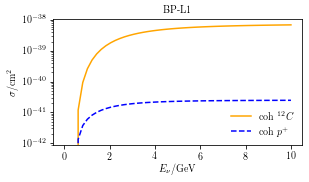

In [41]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib.pyplot import *
from matplotlib.legend_handler import HandlerLine2D


fsize=10
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = [
r'\usepackage{amsmath}',
r'\usepackage{amssymb}']
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
            'figure.figsize':(1.2*3.7,2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
plt.rcParams['hatch.linewidth'] = 0.3
rcParams.update(params)
axes_form  = [0.17,0.17,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)

ax.plot(E,sigmaCOH, c='orange', ls='-', label=r'coh $^{12}C$')
ax.plot(E,sigmaDIF, c='blue', ls='--', label=r'coh $p^+$')

ax.set_yscale('log')

ax.set_xlabel(r'$E_\nu/$GeV')
ax.set_ylabel(r'$\sigma/$cm$^2$')
ax.set_title(r'BP-L1',fontsize=fsize)
ax.legend(loc='lower right',frameon=False)

fig.savefig('plots/first_xsec_check.pdf')
